In [1]:
# Attribute Information

# date time year-month-day hour:minute:second
# Temperature, in Celsius
# Relative Humidity, %
# Light, in Lux
# CO2, in ppm
# Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air
# Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_test1 = pd.read_csv('datatest.txt')
df_test2 = pd.read_csv('datatest2.txt')
df_train = pd.read_csv('datatraining.txt')

In [4]:
df_test1.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [5]:
df_train.head()

,no,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [6]:
# All text files has seven columns as date, temperature, humidity, light, CO2, humidity ratio and occupancy.

# Temperature in Celsius.
# Relative humidity as a percentage.
# Light measured in lux.
# Carbon dioxide measured in parts per million.
# Humidity ratio, derived from temperature and relative humidity measured in kilograms of water vapor per kilogram of air.
# Occupancy as either 1 for occupied or 0 for not occupied.

In [7]:
df=pd.concat([df_test1,df_test2,df_train]).reset_index(drop=True)

In [8]:
# Exploratory Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
 7   no             8143 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.3+ MB


In [10]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,no
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,8143.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031,4072.000000
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503,2350.825954
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000,1.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000,2036.500000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000,4072.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000,6107.500000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000,8143.000000


In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
df['date'][0]

Timestamp('2015-02-02 14:19:00')

In [13]:
#normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
df[columns]=scaler.fit_transform(np.array(df[columns]))

In [15]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,no
0,2015-02-02 14:19:00,0.869029,0.418677,0.344793,0.202224,0.549737,1,NaN
1,2015-02-02 14:19:59,0.872357,0.419468,0.340787,0.208956,0.551972,1,NaN
2,2015-02-02 14:21:00,0.874576,0.416831,0.337409,0.214525,0.549997,1,NaN
3,2015-02-02 14:22:00,0.873190,0.412217,0.290912,0.217581,0.544374,1,NaN
4,2015-02-02 14:23:00,0.879014,0.415513,0.287877,0.220135,0.550376,1,NaN


In [16]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,no
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,8143.000000
mean,0.352458,0.479496,0.077040,0.166974,0.408794,0.231031,4072.000000
std,0.195127,0.218948,0.123983,0.187048,0.201971,0.421503,2350.825954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.221880,0.340804,0.000000,0.028400,0.274836,0.000000,2036.500000
50%,0.314330,0.463415,0.000000,0.091761,0.425517,0.000000,4072.000000
75%,0.466872,0.639200,0.177346,0.235562,0.567518,0.000000,6107.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8143.000000


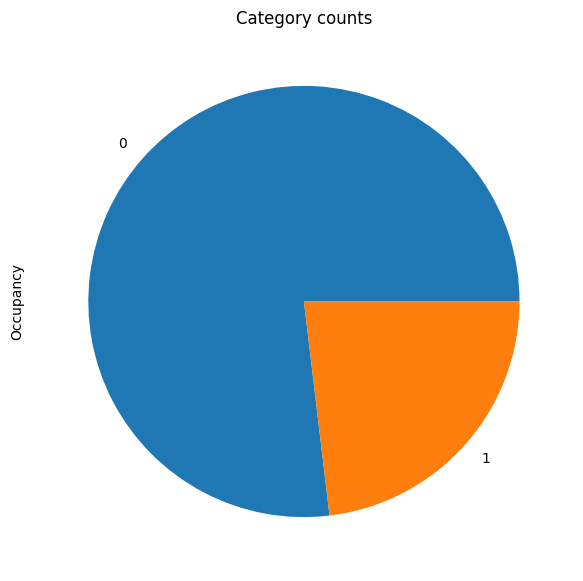

In [17]:
plt.figure(figsize=(7,7))
df['Occupancy'].value_counts().plot(kind='pie');
plt.title('Category counts');

In [18]:
# So we can see there are more samples of class 0 that the room occupance is null,

# To tackle this, we can do is Undersampling i.e. randomly selecting some samples from the class 0 and balancing the dataset, while another approach is Oversampling where we create copies of the minority class to equate it to the class that dominates. Alternatively we can use Ensemble techniques to overcome this phenomenon

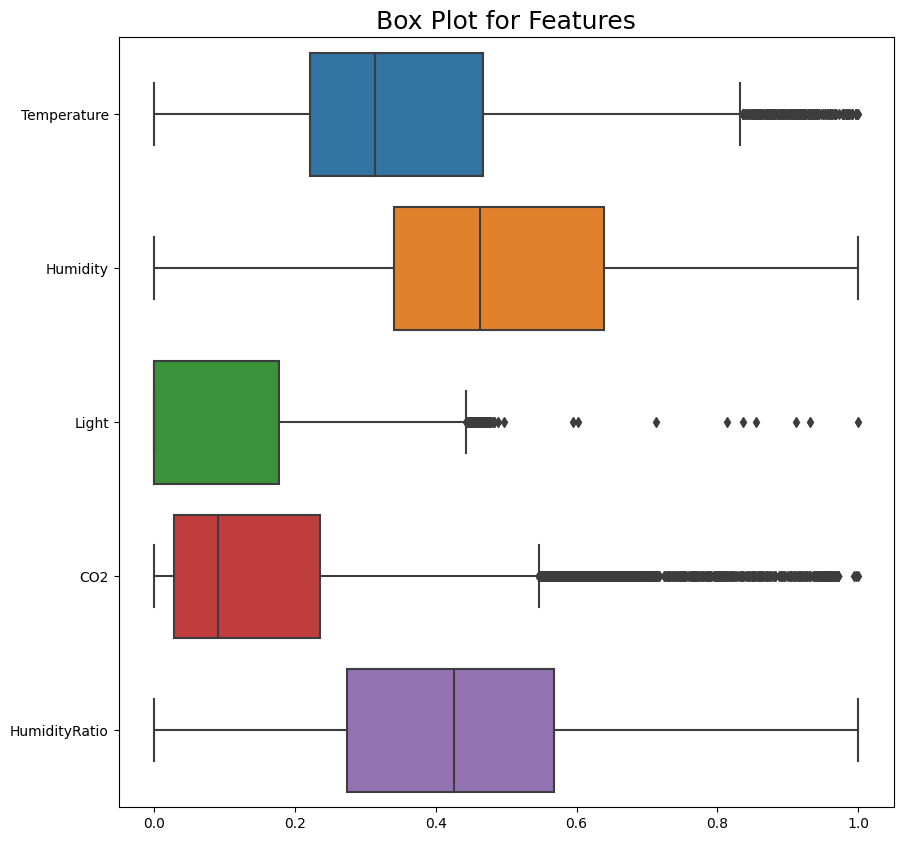

In [19]:
plt.figure(figsize=(10,10))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data=df.drop(['no','date', 'Occupancy'],axis=1), orient="h")

In [20]:
# The Box plots show how the data of each columns is varied in between 0 and 1. Also we can infer that there are many outliers in Co2 towards 0.6 and 1 while there are some in Light and Temperature. The data of Humidity and Humidity ratio is very equally distributed.

# Now we will see the correlation of the values

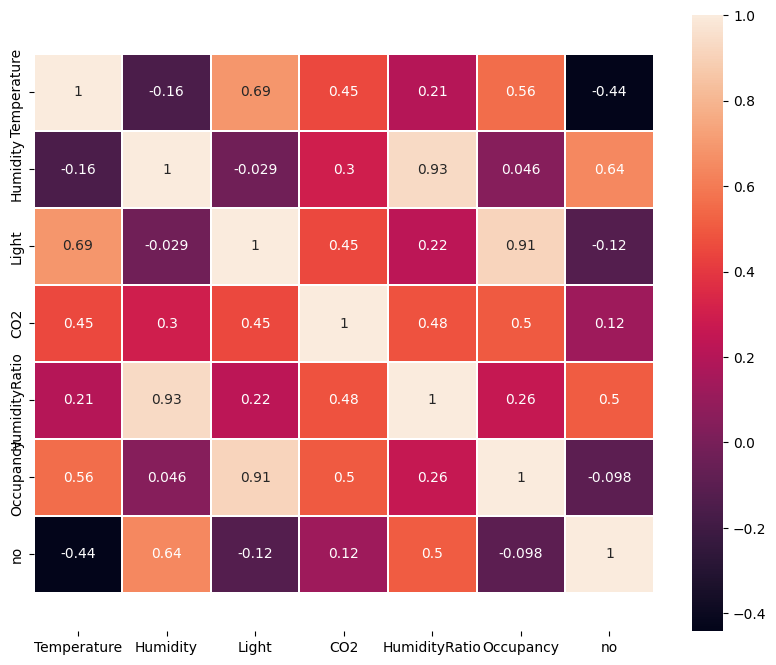

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, linewidths=0.1)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

In [22]:
# From this we can see that the correlation between the variable that we will use to predict that is Occupancy and other variables can be considered.

In [23]:
# Here correlation between Temperature, Light and Co2 can be seen prominent
# As obvious if there is enough light, if the temperature is well enough and Co2 level is low or we can say room is more ventilated, there would be high chances of occupancy and there may be the highly deciding factors for the data

# Also this reminds of another alternative that how can we think of time of day and the room occupancy As we have the timestamps, we can divide the data into different slots like Morning, Evening, Night etc.

In [24]:
occupacy = []
non_occupacy = []
for date in df[df['Occupancy'] == 1]['date']:
    occupacy.append(date.hour)
for date in df[df['Occupancy'] == 0]['date']:
    non_occupacy.append(date.hour)

C:\Users\sk889\AppData\Local\Temp\ipykernel_11032\2299589754.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(occupacy)
C:\Users\sk889\AppData\Local\Temp\ipykernel_11032\2299589754.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(non_occupacy)


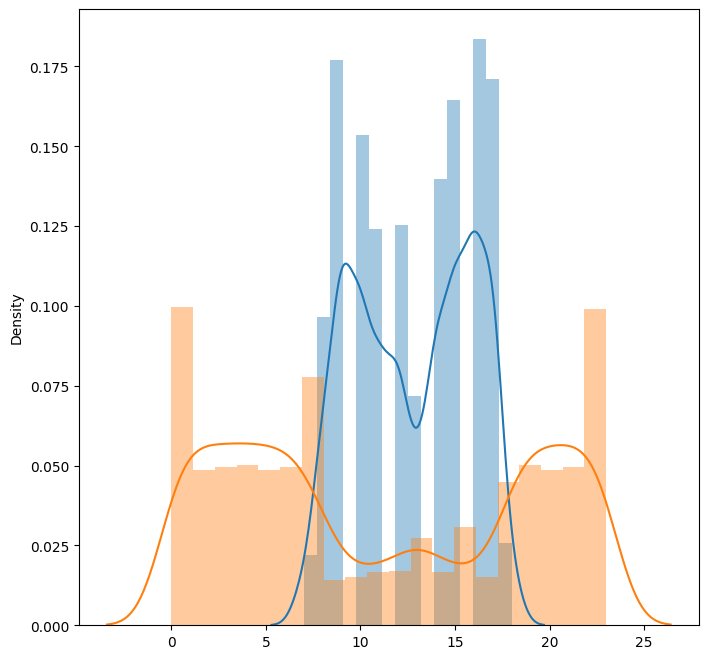

In [25]:
plt.figure(figsize=(8,8))
ax = sns.distplot(occupacy)
ax = sns.distplot(non_occupacy)

In [26]:
min(occupacy)

7

In [27]:
max(occupacy)

18

In [28]:
# So occupancy is there only when the time of the day is between 7 and 18 that majorly denotes the working hours

In [29]:
df['work']=df['date'].apply(lambda x: 1 if(x.hour>7 and x.hour<18) else 0)

In [30]:
df[['work','Occupancy']].corr()

,work,Occupancy
work,1.000000,0.653711
Occupancy,0.653711,1.000000


In [31]:
# So there is a correlation of 0.63 if the work hours are on. It cannot be considered highly correlated but definitely data parameter could be used this way to help us predict the occupancy

In [32]:
df.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy', 'no', 'work'],
      dtype='object')

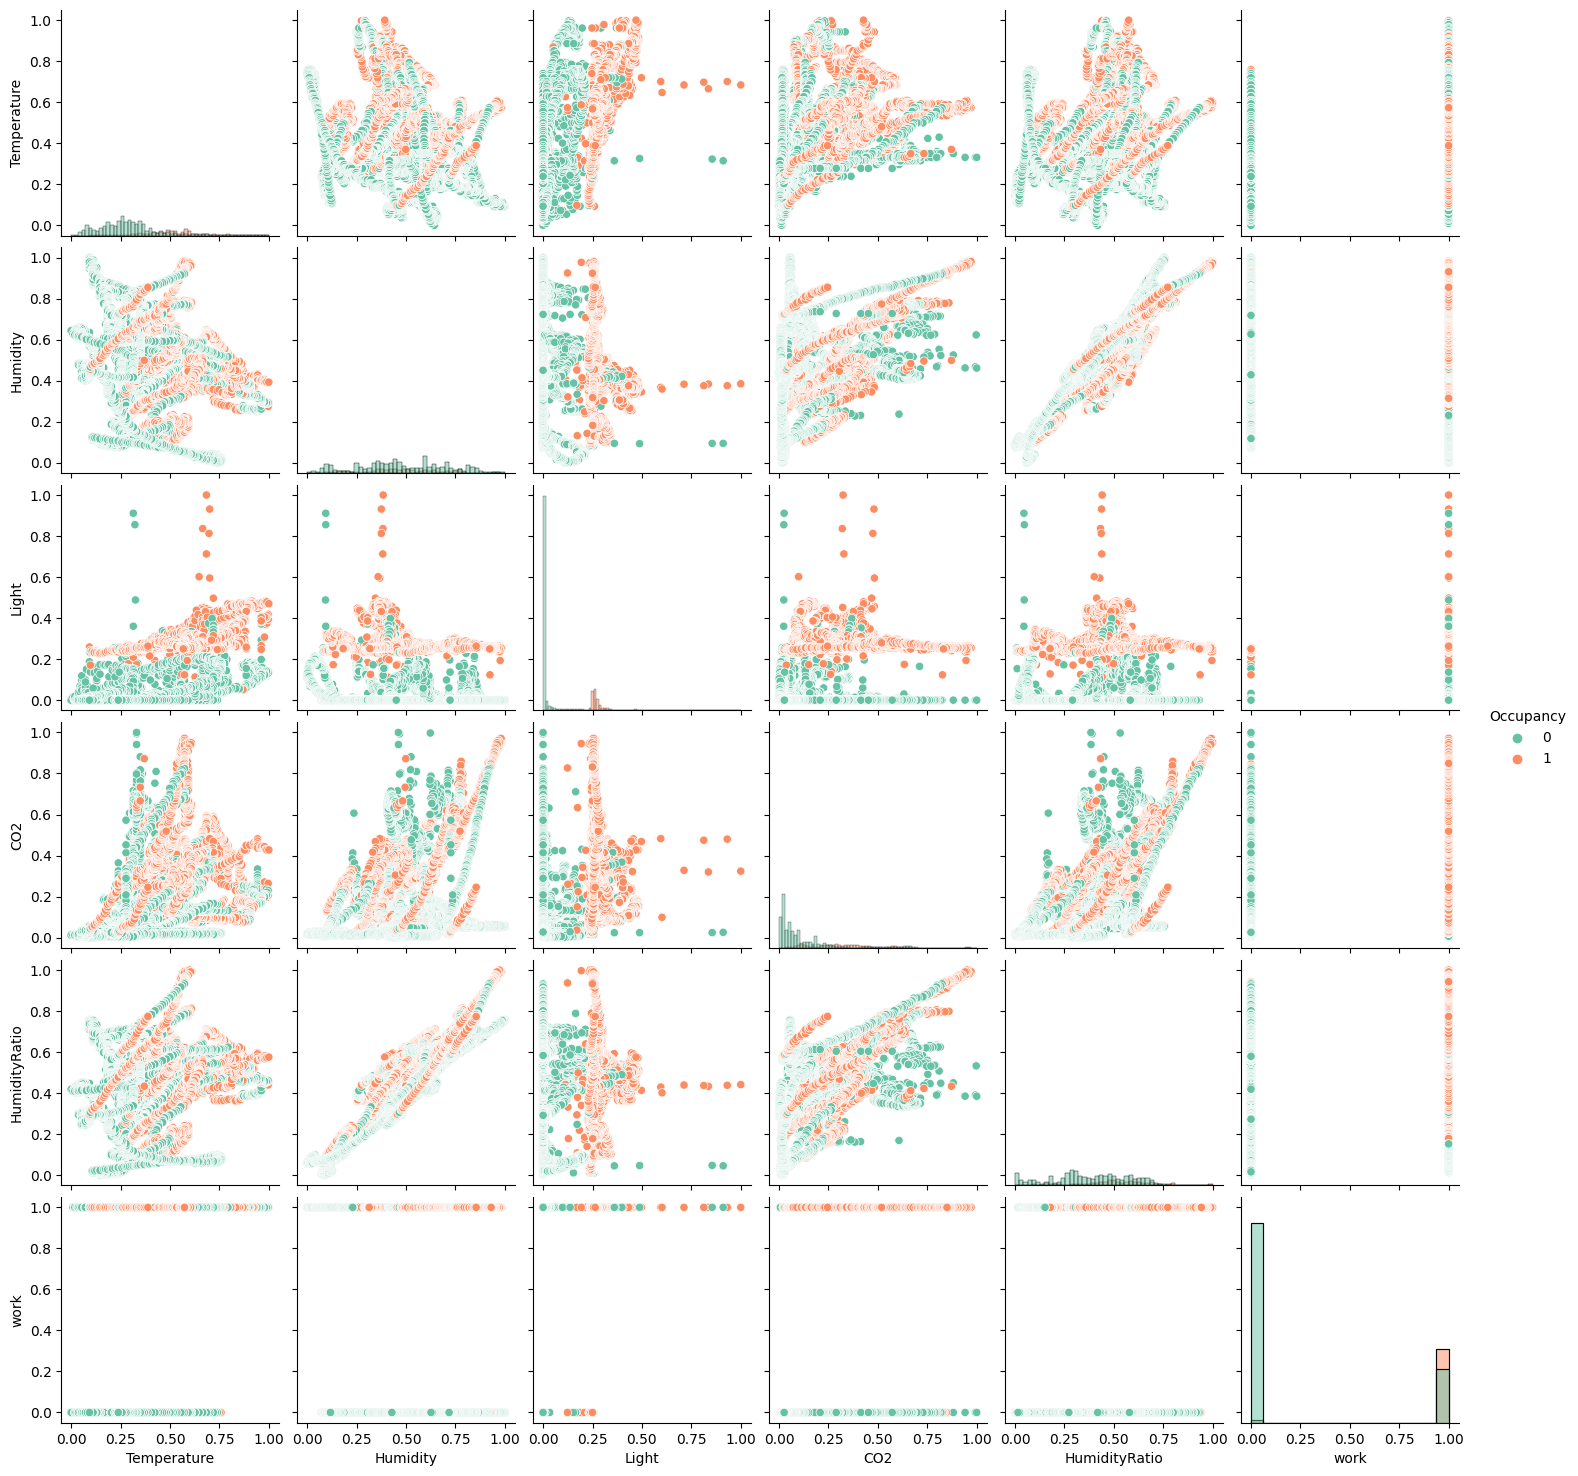

In [33]:
sns.pairplot(df[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio','work','Occupancy']],hue='Occupancy' ,diag_kind = "hist",palette='Set2')

In [34]:
# Split Data into train test

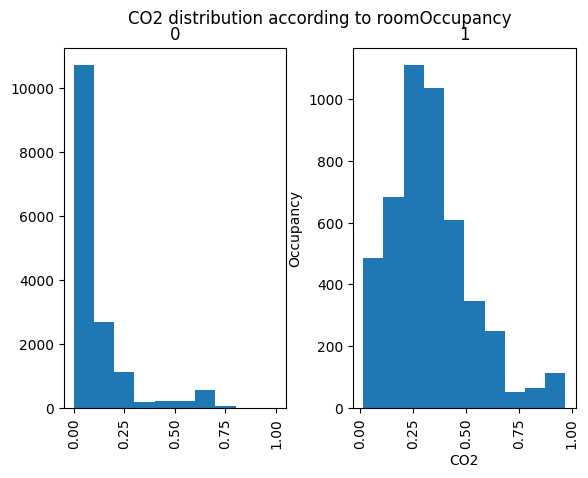

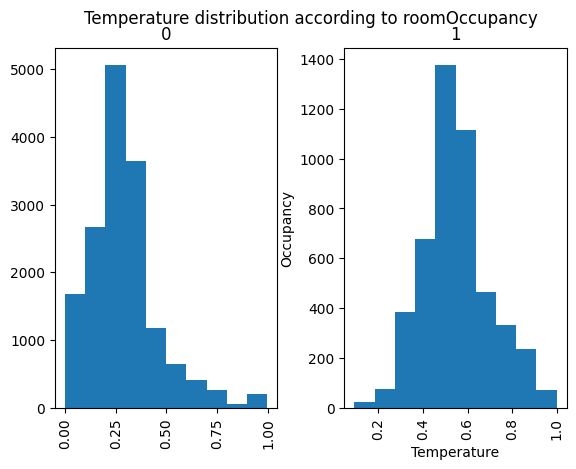

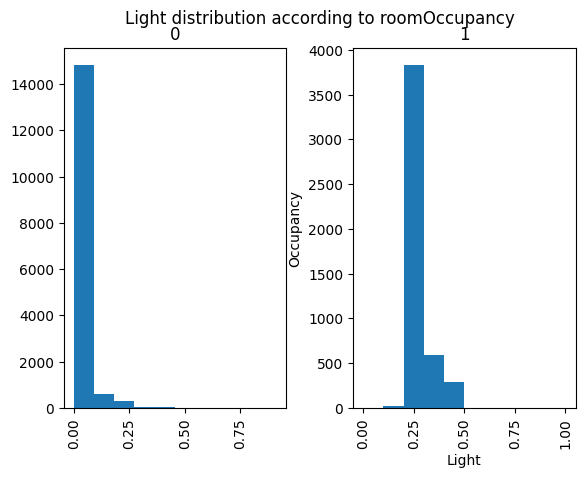

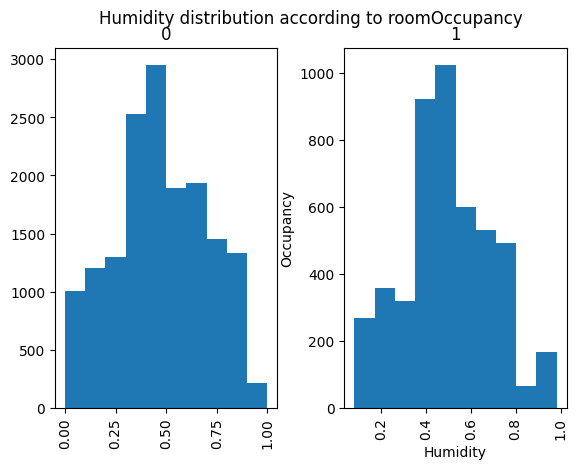

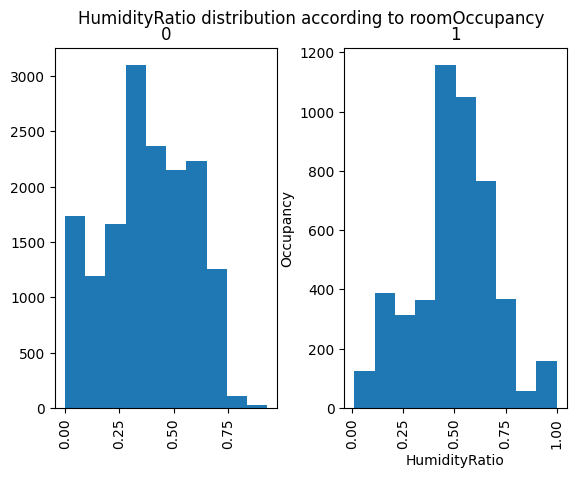

In [35]:
def fonk(a,b):
    not_missing = df[(df[a].notnull())]
    not_missing.hist(column = a, by=b)
    plt.xlabel(a)
    plt.ylabel(b)
    plt.suptitle(a + " distribution according to room" +b)
fonk('CO2', 'Occupancy')
fonk('Temperature', 'Occupancy')
fonk('Light','Occupancy')
fonk('Humidity', 'Occupancy')
fonk('HumidityRatio', 'Occupancy')

In [36]:
X =  df[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'work']]
y = df['Occupancy']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [38]:
# ROC , AUC curve Function definition

In [39]:
# To plot the ROC curve and get the Area under the curve, we will create a function to plot the curve and also get the AUC directly. This can be done using the auc and roc_curve functions of sklearn

In [40]:
# Function to get ROC curve and AUC 
from sklearn.metrics import roc_curve, auc
def plot_roc(y_test,y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

In [41]:
# Decision tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy')
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

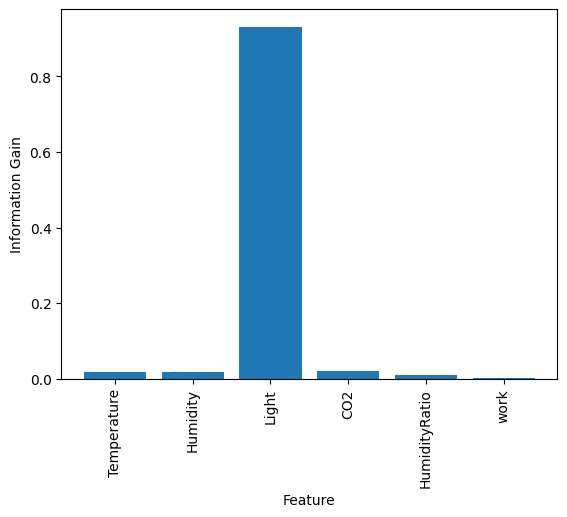

In [43]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

features=['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'work']
# Get feature importances
importances = dt_classifier.feature_importances_
indices = range(len(importances))

# Plot feature importances
plt.bar(indices, importances)
plt.xticks(indices,features, rotation='vertical')
plt.xlabel("Feature")
plt.ylabel("Information Gain")
plt.show()

In [1]:
# create decision tree plot
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(110,60))
plot_tree(dt_classifier, feature_names=features, class_names=["unoccupied", "occupied"], filled=True, fontsize=30)
plt.show()

NameError: name 'dt_classifier' is not defined

<Figure size 11000x6000 with 0 Axes>

In [55]:
dt_preds = dt_classifier.predict(X_test)

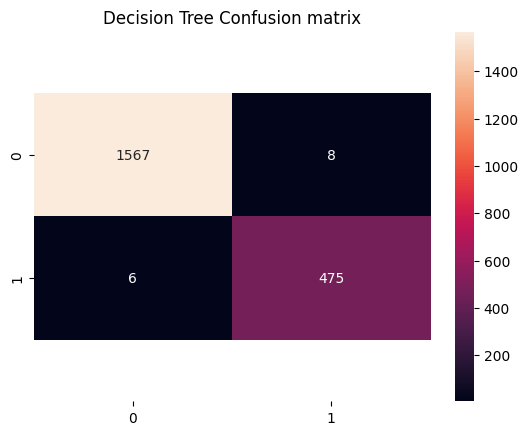

In [46]:
from sklearn.metrics import confusion_matrix
plt.title("Decision Tree Confusion matrix")
ax = sns.heatmap(confusion_matrix(y_test, dt_preds), annot=True, fmt="d")
b, t = plt.ylim()
b += 0.5 
t -= 0.5 
plt.ylim(b, t)
plt.show() 

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_preds))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1575
           1       0.98      0.99      0.99       481

    accuracy                           0.99      2056
   macro avg       0.99      0.99      0.99      2056
weighted avg       0.99      0.99      0.99      2056



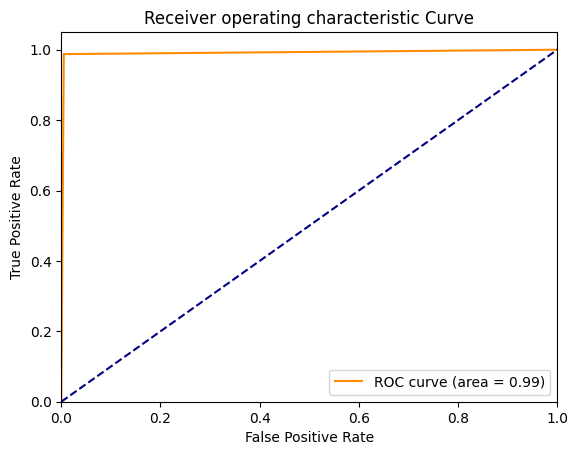

In [48]:
plot_roc(y_test,dt_preds)

0.9869405642329006


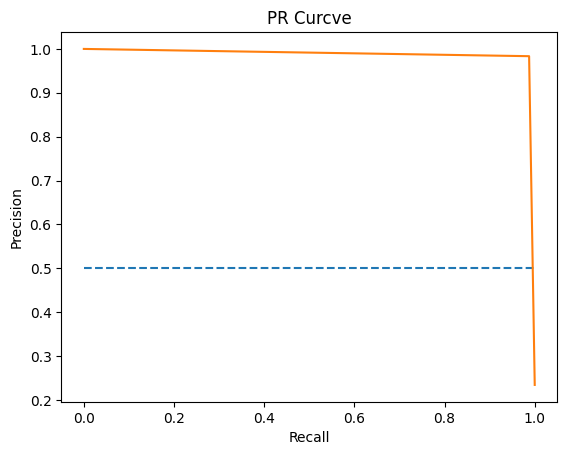

In [49]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

#Step1: Extract the prob values for label 1
probabilityValues = dt_classifier.predict_proba(X_test)[:,1]

#Step2: Calc PR and AUC
precision,recall,_ = precision_recall_curve(y_test, probabilityValues)
aucPR = auc(recall,precision)
print(aucPR)

#Step3: Plot the Skill line (0,0.5) (1,0.5)
plt.plot([0,1],[0.5,0.5], linestyle='--')

#Step4: Plot PR Curve
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curcve')
plt.plot(recall,precision)

In [50]:
from sklearn.metrics import accuracy_score
print("Report")
print("--------------------------------------------------")
print("Decision Tree")
print(classification_report(y_test, dt_preds))
print("--------------------------------------------------")
accuracy = accuracy_score(y_test, dt_preds)
print("Accuracy:", accuracy)
print("--------------------------------------------------")
print("Decision Tree")
print(accuracy_score(y_test, dt_preds))
print("--------------------------------------------------")

Report
--------------------------------------------------
Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1575
           1       0.98      0.99      0.99       481

    accuracy                           0.99      2056
   macro avg       0.99      0.99      0.99      2056
weighted avg       0.99      0.99      0.99      2056

--------------------------------------------------
Accuracy: 0.9931906614785992
--------------------------------------------------
Decision Tree
0.9931906614785992
--------------------------------------------------


In [51]:
#decision tree from scratch

# select relevant features
features=['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']

# create decision tree
def predict_occupancy(light, temperature, humidity, co2,HumidityRatio):
    if light <= 0.228:
        if HumidityRatio<=0.934:
            return 0
        else:
            return 1
    elif co2<=0.036:
        if light<=0.245:
            return 1
        else:
            return 0
    else:
        return 1
       

# make predictions on test set
y_true = []
y_predicted = []
for i in range(len(X_test)):
    row = X_test.iloc[i]
    row2=y_test.iloc[i]
    occupancy = predict_occupancy(row["Light"], row["Temperature"], row["Humidity"], row["CO2"],row['HumidityRatio'])
    y_predicted.append(occupancy)
    y_true.append(row2)
    
# calculate accuracy
accuracy = accuracy_score(y_test, y_predicted)

# print accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9897859922178989


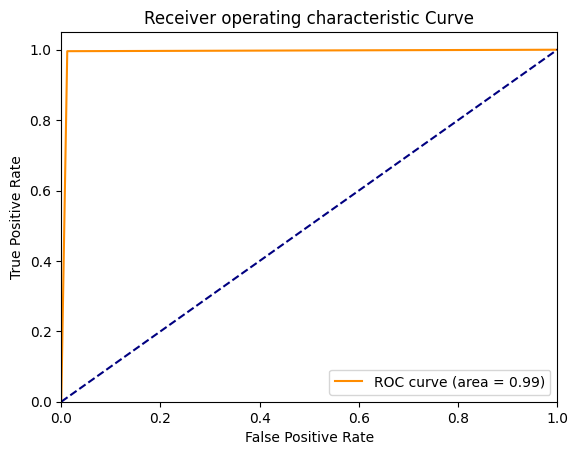

In [52]:
plot_roc(y_test,y_predicted)

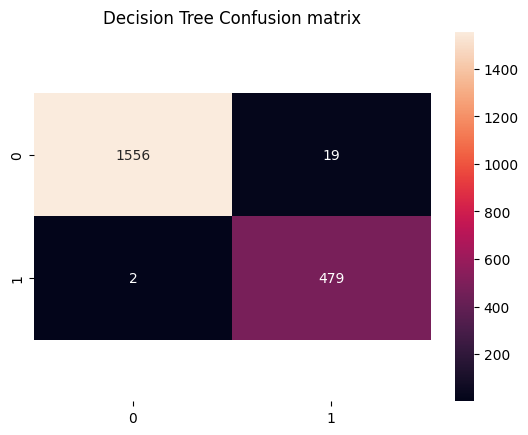

In [53]:
plt.title("Decision Tree Confusion matrix")
ax = sns.heatmap(confusion_matrix(y_test, y_predicted), annot=True, fmt="d")
b, t = plt.ylim()
b += 0.5 
t -= 0.5 
plt.ylim(b, t)
plt.show() 